<a href="https://colab.research.google.com/github/lufthanza/deploy_uts_psd/blob/main/uts_psd1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**UTS PSD**

Load dan Persiapan Data

# Data Understanding

# **mengambil data**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import plotly.express as px
from scipy import stats
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

color_pal = sns.color_palette()
plt.style.use("fivethirtyeight")

In [ ]:
# Memuat data dari file CSV
file_path = 'Tabel Harga Berdasarkan Daerah(Mingguan).csv'
data = pd.read_csv(file_path)

# Menampilkan beberapa baris pertama dari dataframe
print(data.head())


      Tanggal  Harga
0    1/9/2022  40500
1    8/9/2022  40500
2  15/09/2022  40500
3  22/09/2022  40500
4  29/09/2022  22650


# **Plotting Data**

      Tanggal  Harga
0    1/9/2022  40500
1    8/9/2022  40500
2  15/09/2022  40500
3  22/09/2022  40500
4  29/09/2022  22650


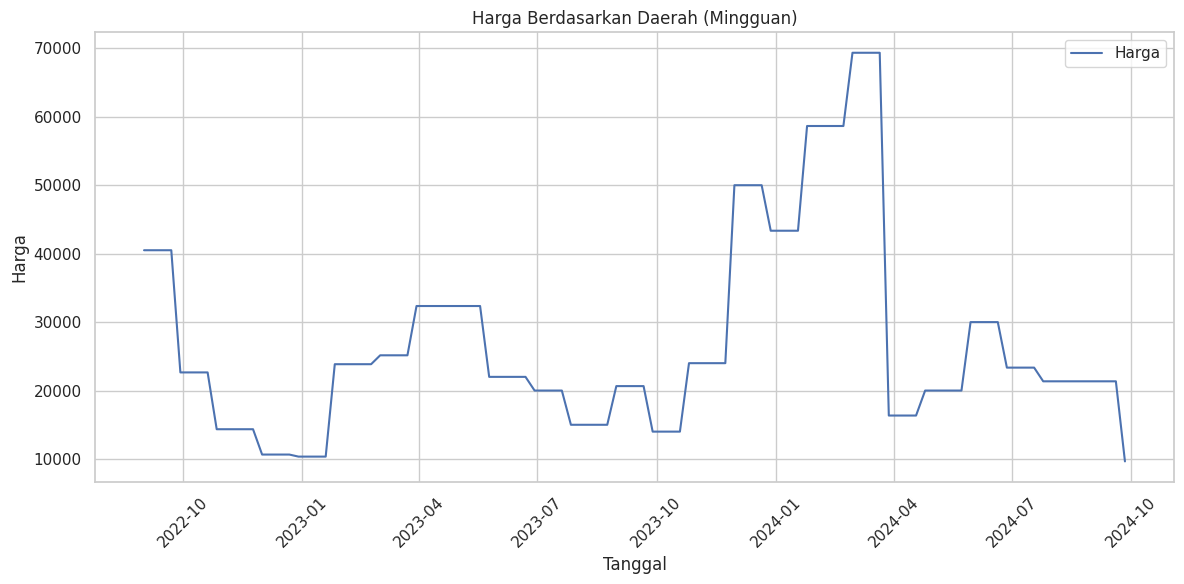

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Memuat data dari file CSV
file_path = 'Tabel Harga Berdasarkan Daerah(Mingguan).csv'
data = pd.read_csv(file_path)

# Menampilkan beberapa baris pertama dari dataframe
print(data.head())

# Mengatur gaya plotting
sns.set(style="whitegrid")

# Memastikan kolom tanggal diubah menjadi tipe datetime
data['Tanggal'] = pd.to_datetime(data['Tanggal'], format='%d/%m/%Y', dayfirst=True)

# Memplot data
plt.figure(figsize=(12, 6))
for column in data.columns[1:]:  # Mengasumsikan kolom pertama adalah tanggal
    plt.plot(data['Tanggal'], data[column], label=column)

plt.title('Harga Berdasarkan Daerah (Mingguan)')
plt.xlabel('Tanggal')
plt.ylabel('Harga')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
data.describe()

,Tanggal,Harga
count,109,109.000000
mean,2023-09-14 00:00:00,26928.899083
min,2022-09-01 00:00:00,9650.000000
25%,2023-03-09 00:00:00,20000.000000
50%,2023-09-14 00:00:00,22650.000000
75%,2024-03-21 00:00:00,32350.000000
max,2024-09-26 00:00:00,69350.000000
std,NaN,14511.266845


# **Sliding Window**

**sliding window sebelum normalisasi**

In [ ]:
import numpy as np
import pandas as pd

file_path = 'Tabel Harga Berdasarkan Daerah(Mingguan).csv'
data = pd.read_csv(file_path)
df_slide = pd.DataFrame(data)

# Fungsi untuk membuat sliding window
def create_sliding_window(data, leg):
    X, y = [], []
    for i in range(len(data) - leg):
        X.append(data[i:i + leg])
        y.append(data[i + leg])
    return np.array(X), np.array(y)

# Membuat fungsi yang fleksibel untuk mengatur sliding window berdasarkan input leg (window size)
def sliding_window_by_leg(leg):
    # Membuat sliding window dengan ukuran sesuai leg (window size)
    X, y = create_sliding_window(df_slide['Harga'].values, leg)

    # Menggabungkan data sliding window dengan target untuk ditampilkan
    sliding_window_df = pd.DataFrame(X, columns=[f'Minggu ke-{i+1}' for i in range(leg)])
    sliding_window_df['Target (Minggu ke+1)'] = y

    return sliding_window_df.head()

# Contoh penggunaan fungsi untuk leg 4
result = sliding_window_by_leg(4)
print(result)  # Menampilkan hasil


   Minggu ke-1  Minggu ke-2  Minggu ke-3  Minggu ke-4  Target (Minggu ke+1)
0        40500        40500        40500        40500                 22650
1        40500        40500        40500        22650                 22650
2        40500        40500        22650        22650                 22650
3        40500        22650        22650        22650                 22650
4        22650        22650        22650        22650                 14350


# **Normalisasi**

In [ ]:
# Asumsi kolom 'Tanggal' dan 'Harga' ada di dataset
# Jika nama kolom berbeda, sesuaikan dengan nama yang tepat
data_normalized = data.copy()

# Normalisasi kolom 'Harga' menggunakan MinMaxScaler
scaler = MinMaxScaler()
data_normalized['Harga'] = scaler.fit_transform(data_normalized[['Harga']])

# Mengatur kolom Tanggal sebagai index
df_slide_normalized = data_normalized[['Tanggal', 'Harga']].set_index('Tanggal')

# Tentukan ukuran window (misalnya, 4 minggu)
window_size = 4

In [ ]:
data_slide = data_normalized.copy()

**Sliding Window setelah normalisasi**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Salin data dan hilangkan kolom Tanggal sebelum normalisasi
data_normalized = data.copy()

# Normalisasi data harga dengan MinMaxScaler
scaler = MinMaxScaler()
data_normalized['Harga'] = scaler.fit_transform(data_normalized[['Harga']])

# Membuat sliding window setelah normalisasi
df_slide_normalized = data_normalized[['Tanggal', 'Harga']]
df_slide_normalized.set_index('Tanggal', inplace=True)

# Membuat sliding window dengan ukuran window 4 minggu
X_normalized, y_normalized = create_sliding_window(df_slide_normalized['Harga'].values, window_size)

# Menggabungkan hasil sliding window yang sudah dinormalisasi
sliding_window_normalized_df = pd.DataFrame(X_normalized, columns=[f'Week-{i+1}' for i in range(window_size)])
sliding_window_normalized_df['Target (Week+1)'] = y_normalized

# Menampilkan hasil sliding window normalisasi (5 contoh pertama)
sliding_window_normalized_df.head()


,Week-1,Week-2,Week-3,Week-4,Target (Week+1)
0,0.516750,0.516750,0.516750,0.516750,0.217755
1,0.516750,0.516750,0.516750,0.217755,0.217755
2,0.516750,0.516750,0.217755,0.217755,0.217755
3,0.516750,0.217755,0.217755,0.217755,0.217755
4,0.217755,0.217755,0.217755,0.217755,0.078727


In [ ]:
data_slide.dtypes

,0
Tanggal,object
Harga,float64


# **Visualisasi Data**

In [ ]:
print(data_slide.isnull().sum())

Tanggal    0
Harga      0
dtype: int64


# **Cek Data Outlier**

**Boxplot**

In [ ]:
# # Mengatur gaya plotting
# sns.set(style="whitegrid")

# # Membuat boxplot untuk setiap kolom harga
# plt.figure(figsize=(12, 6))
# sns.boxplot(data=data_normalized[data_normalized.columns[1:]])  # Mengabaikan kolom tanggal
# plt.title('Boxplot Harga Berdasarkan Daerah (Mingguan)')
# plt.xlabel('Daerah')
# plt.ylabel('Harga (Dinormalisasi)')
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()


In [ ]:
import pandas as pd
from scipy.stats import zscore

# Memuat data dari file CSV
file_path = 'Tabel Harga Berdasarkan Daerah(Mingguan).csv'
data = pd.read_csv(file_path)

# Menghitung Z-score untuk setiap kolom numerik
z_scores = data.select_dtypes(include=[float, int]).apply(zscore)

# Menentukan threshold untuk mendeteksi outlier (biasanya 3 atau -3)
threshold = 3
outliers = (z_scores > threshold) | (z_scores < -threshold)

# Menampilkan data yang mengandung outlier
data_outliers = data[outliers.any(axis=1)]
print("Data dengan Outlier:")
print(data_outliers)


Data dengan Outlier:
Empty DataFrame
Columns: [Tanggal, Harga]
Index: []


Data dengan Deteksi Outlier:
                  xt  IQR_Outlier   Z_Score  Z_Score_Outlier
Tanggal                                                     
2022-09-01  0.516750        False  0.939531            False
2022-09-08  0.516750        False  0.939531            False
2022-09-15  0.516750        False  0.939531            False
2022-09-22  0.516750        False  0.939531            False
2022-09-29  0.217755        False -0.296229            False
...              ...          ...       ...              ...
2024-08-29  0.195980        False -0.386229            False
2024-09-05  0.195980        False -0.386229            False
2024-09-12  0.195980        False -0.386229            False
2024-09-19  0.195980        False -0.386229            False
2024-09-26  0.000000        False -1.196223            False

[109 rows x 4 columns]


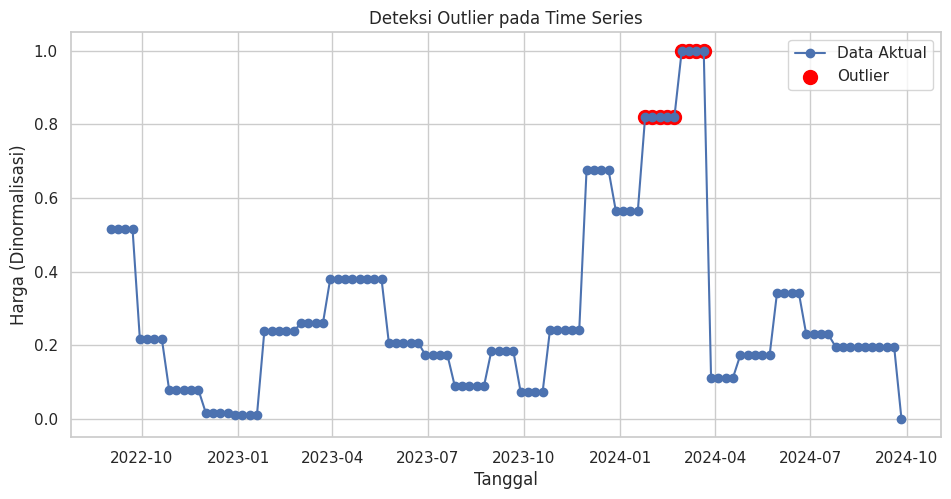

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore

# Memuat data dari file CSV
file_path = 'Tabel Harga Berdasarkan Daerah(Mingguan).csv'
data = pd.read_csv(file_path)

# Memastikan kolom tanggal diubah menjadi tipe datetime
data['Tanggal'] = pd.to_datetime(data['Tanggal'], format='%d/%m/%Y', dayfirst=True)

# Normalisasi data
scaler = MinMaxScaler()
data_normalized = data.copy()
data_normalized[data_normalized.columns[1:]] = scaler.fit_transform(data_normalized[data_normalized.columns[1:]])

# Menyiapkan data untuk analisis outlier
# Kita asumsikan 'xt' adalah kolom harga pertama setelah tanggal
df_slide = data_normalized[['Tanggal', data_normalized.columns[1]]].rename(columns={data_normalized.columns[1]: 'xt'})
df_slide.set_index('Tanggal', inplace=True)

# === 1. Metode IQR (Interquartile Range) ===
Q1 = df_slide['xt'].quantile(0.25)  # Kuartil pertama
Q3 = df_slide['xt'].quantile(0.75)  # Kuartil ketiga
IQR = Q3 - Q1  # Rentang antar kuartil

# Batas atas dan bawah untuk mendeteksi outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menandai outlier (di luar batas IQR)
df_slide['IQR_Outlier'] = (df_slide['xt'] < lower_bound) | (df_slide['xt'] > upper_bound)

# === 2. Metode Z-Score ===
df_slide['Z_Score'] = zscore(df_slide['xt'])
threshold = 3  # Threshold untuk z-score (nilai absolut > 3 dianggap outlier)
df_slide['Z_Score_Outlier'] = df_slide['Z_Score'].abs() > threshold

# Menampilkan Data dengan Outlier Ditandai
print("Data dengan Deteksi Outlier:")
print(df_slide)

# === Visualisasi Outlier ===
plt.figure(figsize=(10, 5))

# Plot data aktual
plt.plot(df_slide.index, df_slide['xt'], label='Data Aktual', marker='o')

# Tandai outlier dengan lingkaran merah
outliers = df_slide[df_slide['IQR_Outlier'] | df_slide['Z_Score_Outlier']]
if not outliers.empty:
    plt.scatter(outliers.index, outliers['xt'], color='red', label='Outlier', s=100)

# Konfigurasi plot
plt.xlabel('Tanggal')
plt.ylabel('Harga (Dinormalisasi)')
plt.title('Deteksi Outlier pada Time Series')
plt.legend()
plt.grid(True)

# Tampilkan plot
plt.show()


# **Training Data**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Membagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat model Bagging dengan estimator Decision Tree
model = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=50, random_state=42)
model.fit(X_train, y_train)

# Melakukan prediksi
y_pred = model.predict(X_test)

# Menghitung Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.02390496960690755


In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Melakukan prediksi
y_pred = model.predict(X_test)

# Menghitung RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse}')


RMSE: 0.15461232035936706


## **prepocessing data**

**Cek Missing Values**

In [ ]:
# Cek missing values sebelum pembersihan
print("Jumlah missing values sebelum pembersihan:")
print(df_slide.isna().sum())

# Menghapus missing values
df_slide_cleaned = df_slide.dropna()

# Cek missing values setelah pembersihan
print("\nJumlah missing values setelah pembersihan:")
print(df_slide_cleaned.isna().sum())

Jumlah missing values sebelum pembersihan:
xt                 0
IQR_Outlier        0
Z_Score            0
Z_Score_Outlier    0
dtype: int64

Jumlah missing values setelah pembersihan:
xt                 0
IQR_Outlier        0
Z_Score            0
Z_Score_Outlier    0
dtype: int64


**Normalisasi Data**

Informasi Data Awal:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Tanggal  109 non-null    datetime64[ns]
 1   Harga    109 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.8 KB
None

Data Setelah Normalisasi:
     Tanggal     Harga
0 2022-09-01  0.516750
1 2022-09-08  0.516750
2 2022-09-15  0.516750
3 2022-09-22  0.516750
4 2022-09-29  0.217755


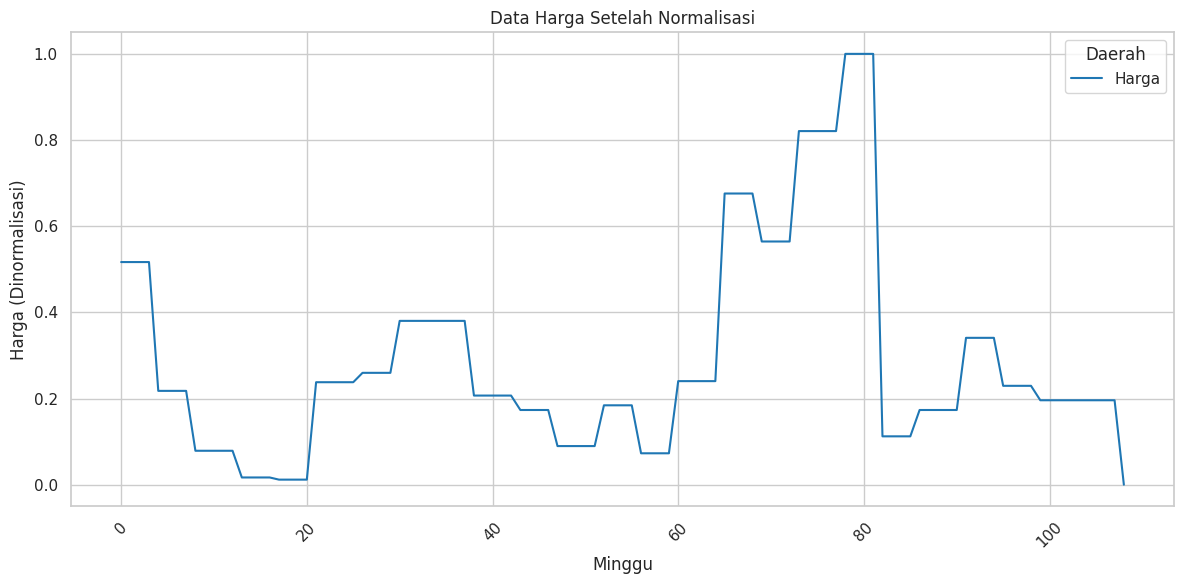

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Memuat data dari file CSV
file_path = 'Tabel Harga Berdasarkan Daerah(Mingguan).csv'
data = pd.read_csv(file_path)

# Memastikan kolom tanggal diubah menjadi tipe datetime
data['Tanggal'] = pd.to_datetime(data['Tanggal'], format='%d/%m/%Y', dayfirst=True)

# Menampilkan informasi awal tentang data
print("Informasi Data Awal:")
print(data.info())

# Mengatur scaler untuk normalisasi
scaler = MinMaxScaler()

# Melakukan normalisasi pada kolom harga
# Asumsikan semua kolom setelah tanggal adalah kolom harga
data_normalized = data.copy()
data_normalized[data_normalized.columns[1:]] = scaler.fit_transform(data_normalized[data_normalized.columns[1:]])

# Menampilkan data yang sudah dinormalisasi
print("\nData Setelah Normalisasi:")
print(data_normalized.head())

# Mengatur gaya plotting
plt.figure(figsize=(12, 6))
sns.lineplot(data=data_normalized.drop(columns='Tanggal'), palette='tab10')
plt.title('Data Harga Setelah Normalisasi')
plt.xlabel('Minggu')
plt.ylabel('Harga (Dinormalisasi)')
plt.xticks(rotation=45)
plt.legend(data_normalized.columns[1:], title='Daerah')
plt.tight_layout()
plt.show()


### **Modelling**

**random forest**

MSE Random Forest (Nominal): 28155307.089566164
RMSE Random Forest (Nominal): 5306.157469352579


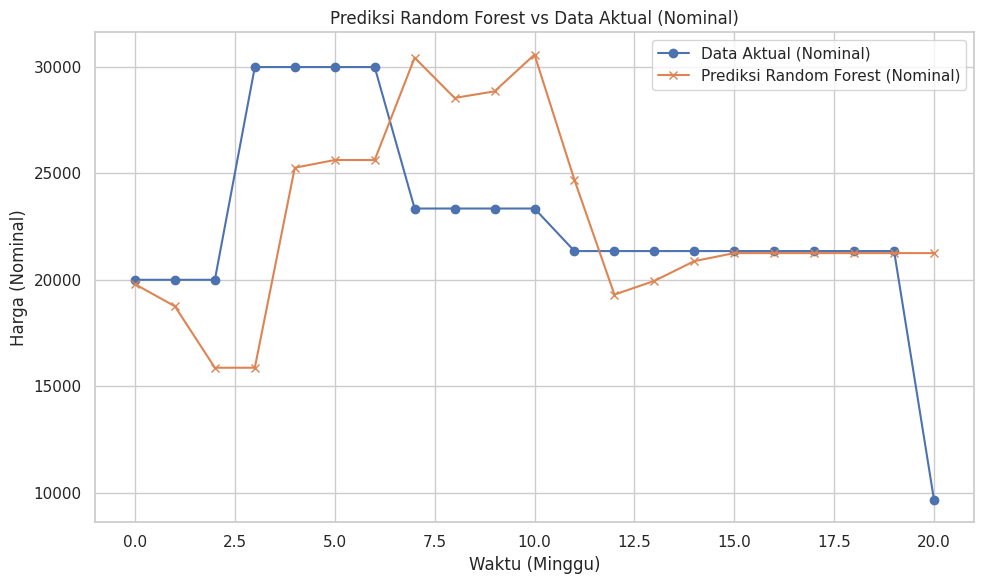

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Memuat data dari file CSV
file_path = 'Tabel Harga Berdasarkan Daerah(Mingguan).csv'
data = pd.read_csv(file_path)

# Memastikan kolom tanggal diubah menjadi tipe datetime
data['Tanggal'] = pd.to_datetime(data['Tanggal'], format='%d/%m/%Y', dayfirst=True)

# Normalisasi data
scaler = MinMaxScaler()
data_normalized = data.copy()
data_normalized[data_normalized.columns[1:]] = scaler.fit_transform(data_normalized[data_normalized.columns[1:]])

# Mengambil salah satu kolom harga untuk prediksi (misalnya kolom kedua)
df_slide = data_normalized[['Tanggal', data_normalized.columns[1]]].rename(columns={data_normalized.columns[1]: 'xt'})
df_slide.set_index('Tanggal', inplace=True)

# Membuat fungsi sliding window
def create_sliding_window(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)

# Membuat data sliding window (gunakan window size 4 minggu)
window_size = 4
X, y = create_sliding_window(df_slide['xt'].values, window_size)

# Membagi data menjadi training dan testing (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# === Model Random Forest Regressor ===
rf_model = RandomForestRegressor(n_estimators=15, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Denormalisasi data test (y_test) dan hasil prediksi (y_pred_rf) ke bentuk nominal
y_test_nominal = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()  # Denormalisasi y_test
y_pred_rf_nominal = scaler.inverse_transform(y_pred_rf.reshape(-1, 1)).flatten()  # Denormalisasi y_pred_rf

# Menghitung MSE dan RMSE dalam bentuk nominal
mse_rf_nominal = mean_squared_error(y_test_nominal, y_pred_rf_nominal)
rmse_rf_nominal = np.sqrt(mse_rf_nominal)
print(f'MSE Random Forest (Nominal): {mse_rf_nominal}')
print(f'RMSE Random Forest (Nominal): {rmse_rf_nominal}')

# === Visualisasi Hasil Prediksi ===
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(y_test_nominal)), y_test_nominal, label='Data Aktual (Nominal)', marker='o')
plt.plot(np.arange(len(y_pred_rf_nominal)), y_pred_rf_nominal, label='Prediksi Random Forest (Nominal)', marker='x')
plt.title('Prediksi Random Forest vs Data Aktual (Nominal)')
plt.xlabel('Waktu (Minggu)')
plt.ylabel('Harga (Nominal)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# **menggunakan MAPE**

MAPE Random Forest: 4168602670163666.50%


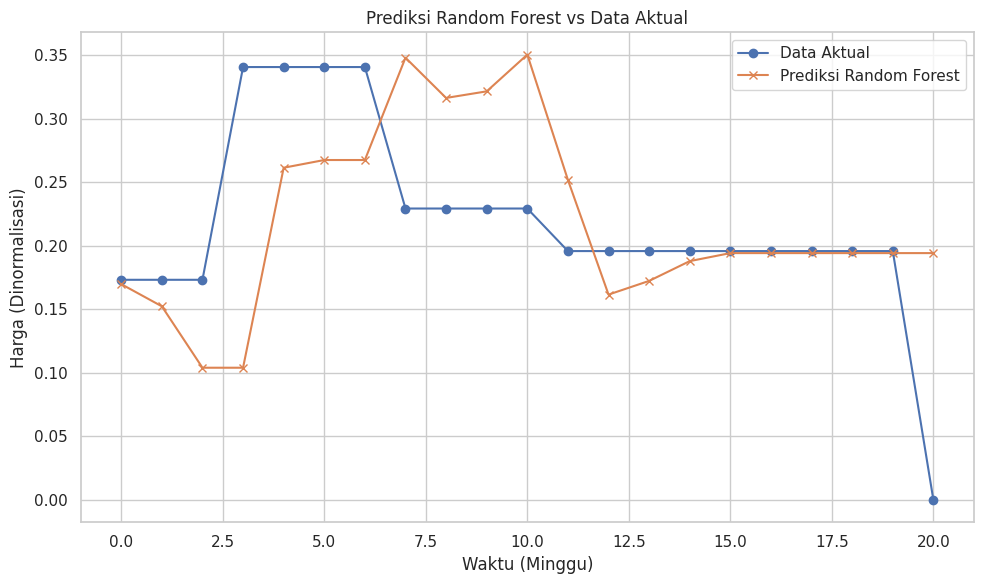

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Memuat data dari file CSV
file_path = 'Tabel Harga Berdasarkan Daerah(Mingguan).csv'
data = pd.read_csv(file_path)

# Memastikan kolom tanggal diubah menjadi tipe datetime
data['Tanggal'] = pd.to_datetime(data['Tanggal'], format='%d/%m/%Y', dayfirst=True)

# Normalisasi data
scaler = MinMaxScaler()
data_normalized = data.copy()
data_normalized[data_normalized.columns[1:]] = scaler.fit_transform(data_normalized[data_normalized.columns[1:]])

# Mengambil salah satu kolom harga untuk prediksi (misalnya kolom kedua)
df_slide = data_normalized[['Tanggal', data_normalized.columns[1]]].rename(columns={data_normalized.columns[1]: 'xt'})
df_slide.set_index('Tanggal', inplace=True)

# Membuat fungsi sliding window
def create_sliding_window(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)

# Membuat data sliding window (gunakan window size 4 minggu)
window_size = 4
X, y = create_sliding_window(df_slide['xt'].values, window_size)

# Membagi data menjadi training dan testing (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# === Model Random Forest Regressor ===
rf_model = RandomForestRegressor(n_estimators=15, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Menghitung MAPE untuk Random Forest
mape_rf = mean_absolute_percentage_error(y_test, y_pred_rf)  # MAPE
print(f'MAPE Random Forest: {mape_rf * 100:.2f}%')  # Ditampilkan dalam persen

# === Visualisasi Hasil Prediksi ===
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(y_test)), y_test, label='Data Aktual', marker='o')
plt.plot(np.arange(len(y_pred_rf)), y_pred_rf, label='Prediksi Random Forest', marker='x')
plt.title('Prediksi Random Forest vs Data Aktual')
plt.xlabel('Waktu (Minggu)')
plt.ylabel('Harga (Dinormalisasi)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


**prediksi harga minggu depan**

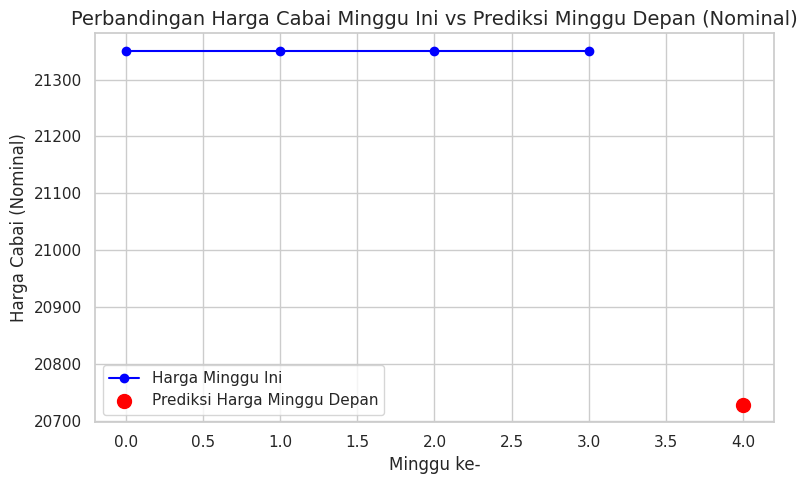

Harga cabai minggu ini (minggu terakhir, nominal): [21350. 21350. 21350. 21350.]
Prediksi harga cabai minggu depan (nominal): 20729.499999999996


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Memuat data dari file CSV
file_path = 'Tabel Harga Berdasarkan Daerah(Mingguan).csv'
data = pd.read_csv(file_path)

# Memastikan kolom tanggal diubah menjadi tipe datetime
data['Tanggal'] = pd.to_datetime(data['Tanggal'], format='%d/%m/%Y', dayfirst=True)

# Normalisasi data
scaler = MinMaxScaler()
data_normalized = data.copy()
data_normalized[data_normalized.columns[1:]] = scaler.fit_transform(data_normalized[data_normalized.columns[1:]])

# Mengambil salah satu kolom harga untuk prediksi (misalnya kolom kedua, harga cabai)
df_slide = data_normalized[['Tanggal', data_normalized.columns[1]]].rename(columns={data_normalized.columns[1]: 'xt'})
df_slide.set_index('Tanggal', inplace=True)

# Membuat fungsi sliding window
def create_sliding_window(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)

# Membuat data sliding window (gunakan window size 4 minggu)
window_size = 4
X, y = create_sliding_window(df_slide['xt'].values, window_size)

# Membagi data menjadi training dan testing (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# === Model Random Forest Regressor ===
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# === Langkah 1: Ambil harga cabai minggu ini ===
# Harga cabai pada minggu terakhir data (harga aktual minggu ini)
current_week_prices = X_test[-1]  # Harga cabai minggu ini (window terakhir dalam data testing)

# === Langkah 2: Prediksi harga minggu depan ===
predicted_price_next_week = rf_model.predict([current_week_prices])[0]  # Prediksi harga minggu depan

# === Denormalisasi harga untuk menampilkan dalam nominal asli ===
# Denormalisasi harga cabai minggu ini
current_week_prices_nominal = scaler.inverse_transform([current_week_prices])[0]

# Denormalisasi harga prediksi minggu depan
predicted_price_next_week_nominal = scaler.inverse_transform([[predicted_price_next_week]])[0][0]

# === Visualisasi perbandingan ===
plt.figure(figsize=(8, 5))

# Plot harga minggu ini (nominal)
plt.plot(np.arange(window_size), current_week_prices_nominal, label='Harga Minggu Ini', color='blue', marker='o', linestyle='-')

# Plot prediksi harga minggu depan (nominal)
plt.scatter(window_size, predicted_price_next_week_nominal, label='Prediksi Harga Minggu Depan', color='red', s=100)

# Menambahkan label dan judul
plt.title('Perbandingan Harga Cabai Minggu Ini vs Prediksi Minggu Depan (Nominal)', fontsize=14)
plt.xlabel('Minggu ke-', fontsize=12)
plt.ylabel('Harga Cabai (Nominal)', fontsize=12)
plt.grid(True)
plt.legend()

# Menampilkan grafik
plt.tight_layout()
plt.show()

# Output hasil nominal
print(f'Harga cabai minggu ini (minggu terakhir, nominal): {current_week_prices_nominal}')
print(f'Prediksi harga cabai minggu depan (nominal): {predicted_price_next_week_nominal}')


**Gradient Boosting Regressor**

RMSE Gradient Boosting (Nominal): 4747.5472447430875


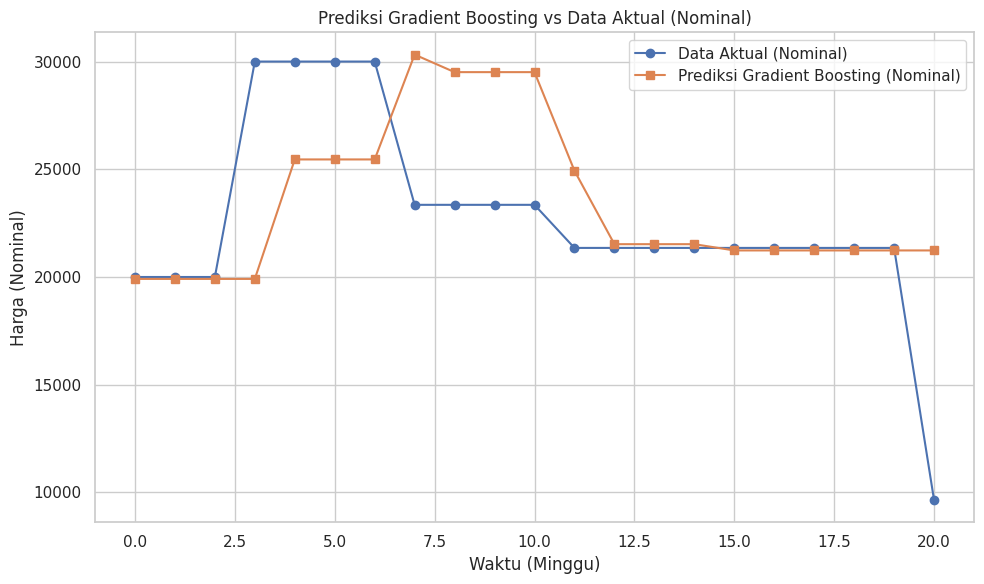

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Memuat data dari file CSV
file_path = 'Tabel Harga Berdasarkan Daerah(Mingguan).csv'
data = pd.read_csv(file_path)

# Memastikan kolom tanggal diubah menjadi tipe datetime
data['Tanggal'] = pd.to_datetime(data['Tanggal'], format='%d/%m/%Y', dayfirst=True)

# Normalisasi data
scaler = MinMaxScaler()
data_normalized = data.copy()
data_normalized[data_normalized.columns[1:]] = scaler.fit_transform(data_normalized[data_normalized.columns[1:]])

# Mengambil salah satu kolom harga untuk prediksi (misalnya kolom kedua)
df_slide = data_normalized[['Tanggal', data_normalized.columns[1]]].rename(columns={data_normalized.columns[1]: 'xt'})
df_slide.set_index('Tanggal', inplace=True)

# Membuat fungsi sliding window
def create_sliding_window(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)

# Membuat data sliding window (gunakan window size 4 minggu)
window_size = 4
X, y = create_sliding_window(df_slide['xt'].values, window_size)

# Membagi data menjadi training dan testing (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# === Model Gradient Boosting Regressor ===
gb_model = GradientBoostingRegressor(n_estimators=18, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

# === Denormalisasi y_test dan y_pred_gb ke bentuk nominal ===
y_test_nominal = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()  # Denormalisasi y_test
y_pred_gb_nominal = scaler.inverse_transform(y_pred_gb.reshape(-1, 1)).flatten()  # Denormalisasi y_pred_gb

# Menghitung RMSE dalam bentuk nominal
rmse_gb_nominal = np.sqrt(mean_squared_error(y_test_nominal, y_pred_gb_nominal))
print(f'RMSE Gradient Boosting (Nominal): {rmse_gb_nominal}')

# === Visualisasi Hasil Prediksi ===
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(y_test_nominal)), y_test_nominal, label='Data Aktual (Nominal)', marker='o')
plt.plot(np.arange(len(y_pred_gb_nominal)), y_pred_gb_nominal, label='Prediksi Gradient Boosting (Nominal)', marker='s')
plt.title('Prediksi Gradient Boosting vs Data Aktual (Nominal)')
plt.xlabel('Waktu (Minggu)')
plt.ylabel('Harga (Nominal)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# **menggunakan MAPE**

MAPE (Mean Absolute Percentage Error) Gradient Boosting: 0.55%


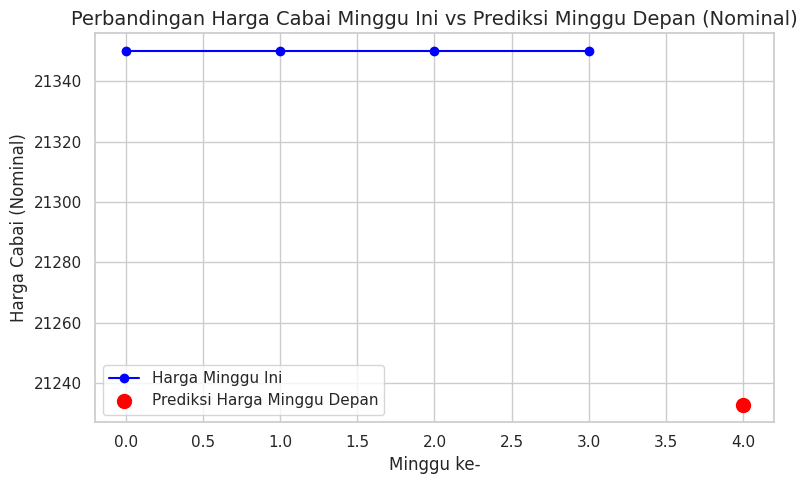

Harga cabai minggu ini (minggu terakhir, nominal): [21350. 21350. 21350. 21350.]
Prediksi harga cabai minggu depan (nominal): 21232.93585831855


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt

# Memuat data dari file CSV
file_path = 'Tabel Harga Berdasarkan Daerah(Mingguan).csv'
data = pd.read_csv(file_path)

# Memastikan kolom tanggal diubah menjadi tipe datetime
data['Tanggal'] = pd.to_datetime(data['Tanggal'], format='%d/%m/%Y', dayfirst=True)

# Normalisasi data
scaler = MinMaxScaler()
data_normalized = data.copy()
data_normalized[data_normalized.columns[1:]] = scaler.fit_transform(data_normalized[data_normalized.columns[1:]])

# Mengambil salah satu kolom harga untuk prediksi (misalnya kolom kedua, harga cabai)
df_slide = data_normalized[['Tanggal', data_normalized.columns[1]]].rename(columns={data_normalized.columns[1]: 'xt'})
df_slide.set_index('Tanggal', inplace=True)

# Membuat fungsi sliding window
def create_sliding_window(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)

# Membuat data sliding window (gunakan window size 4 minggu)
window_size = 4
X, y = create_sliding_window(df_slide['xt'].values, window_size)

# Membagi data menjadi training dan testing (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# === Model Gradient Boosting Regressor ===
gb_model = GradientBoostingRegressor(n_estimators=18, random_state=42)
gb_model.fit(X_train, y_train)

# === Langkah 1: Ambil harga cabai minggu ini ===
# Harga cabai pada minggu terakhir data (harga aktual minggu ini)
current_week_prices = X_test[-1]  # Harga cabai minggu ini (window terakhir dalam data testing)

# === Langkah 2: Prediksi harga minggu depan ===
predicted_price_next_week = gb_model.predict([current_week_prices])[0]  # Prediksi harga minggu depan

# === Denormalisasi harga untuk menampilkan dalam nominal asli ===
# Denormalisasi harga cabai minggu ini
current_week_prices_nominal = scaler.inverse_transform([current_week_prices])[0]

# Denormalisasi harga prediksi minggu depan
predicted_price_next_week_nominal = scaler.inverse_transform([[predicted_price_next_week]])[0][0]

# === Menghitung MAPE (Mean Absolute Percentage Error) ===
# Gunakan nilai aktual minggu terakhir sebagai pembanding
mape = mean_absolute_percentage_error([current_week_prices_nominal[-1]], [predicted_price_next_week_nominal])

print(f'MAPE (Mean Absolute Percentage Error) Gradient Boosting: {mape * 100:.2f}%')

# === Visualisasi perbandingan ===
plt.figure(figsize=(8, 5))

# Plot harga minggu ini (nominal)
plt.plot(np.arange(window_size), current_week_prices_nominal, label='Harga Minggu Ini', color='blue', marker='o', linestyle='-')

# Plot prediksi harga minggu depan (nominal)
plt.scatter(window_size, predicted_price_next_week_nominal, label='Prediksi Harga Minggu Depan', color='red', s=100)

# Menambahkan label dan judul
plt.title('Perbandingan Harga Cabai Minggu Ini vs Prediksi Minggu Depan (Nominal)', fontsize=14)
plt.xlabel('Minggu ke-', fontsize=12)
plt.ylabel('Harga Cabai (Nominal)', fontsize=12)
plt.grid(True)
plt.legend()

# Menampilkan grafik
plt.tight_layout()
plt.show()

# Output hasil nominal
print(f'Harga cabai minggu ini (minggu terakhir, nominal): {current_week_prices_nominal}')
print(f'Prediksi harga cabai minggu depan (nominal): {predicted_price_next_week_nominal}')


**prediksi harga minggu depan**

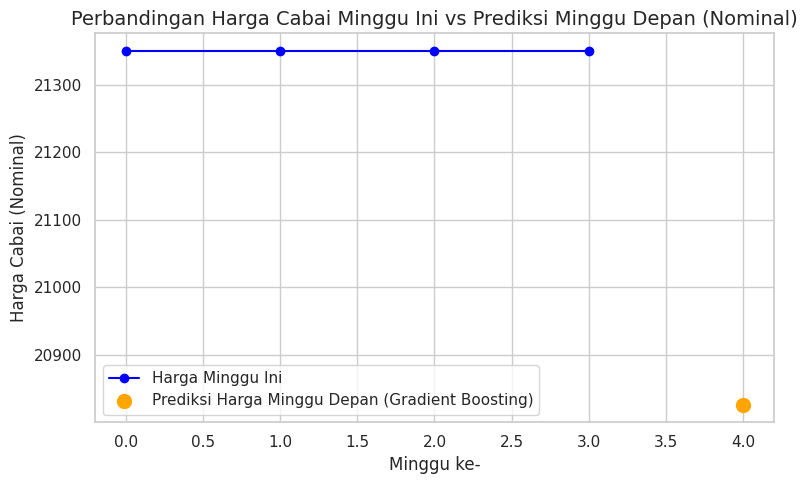

Harga cabai minggu ini (minggu terakhir, nominal): [21350. 21350. 21350. 21350.]
Prediksi harga cabai minggu depan (Gradient Boosting, nominal): 20826.394397418764


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Memuat data dari file CSV
file_path = 'Tabel Harga Berdasarkan Daerah(Mingguan).csv'
data = pd.read_csv(file_path)

# Memastikan kolom tanggal diubah menjadi tipe datetime
data['Tanggal'] = pd.to_datetime(data['Tanggal'], format='%d/%m/%Y', dayfirst=True)

# Normalisasi data
scaler = MinMaxScaler()
data_normalized = data.copy()
data_normalized[data_normalized.columns[1:]] = scaler.fit_transform(data_normalized[data_normalized.columns[1:]])

# Mengambil salah satu kolom harga untuk prediksi (misalnya kolom kedua, harga cabai)
df_slide = data_normalized[['Tanggal', data_normalized.columns[1]]].rename(columns={data_normalized.columns[1]: 'xt'})
df_slide.set_index('Tanggal', inplace=True)

# Membuat fungsi sliding window
def create_sliding_window(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)

# Membuat data sliding window (gunakan window size 4 minggu)
window_size = 4
X, y = create_sliding_window(df_slide['xt'].values, window_size)

# Membagi data menjadi training dan testing (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# === Model Gradient Boosting Regressor ===
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# === Langkah 1: Ambil harga cabai minggu ini ===
# Harga cabai pada minggu terakhir data (harga aktual minggu ini)
current_week_prices = X_test[-1]  # Harga cabai minggu ini (window terakhir dalam data testing)

# === Langkah 2: Prediksi harga minggu depan menggunakan Gradient Boosting ===
predicted_price_next_week_gb = gb_model.predict([current_week_prices])[0]  # Prediksi harga minggu depan

# === Denormalisasi harga untuk menampilkan dalam nominal asli ===
# Denormalisasi harga cabai minggu ini
current_week_prices_nominal = scaler.inverse_transform([current_week_prices])[0]

# Denormalisasi harga prediksi minggu depan (Gradient Boosting)
predicted_price_next_week_nominal_gb = scaler.inverse_transform([[predicted_price_next_week_gb]])[0][0]

# === Visualisasi perbandingan ===
plt.figure(figsize=(8, 5))

# Plot harga minggu ini (nominal)
plt.plot(np.arange(window_size), current_week_prices_nominal, label='Harga Minggu Ini', color='blue', marker='o', linestyle='-')

# Plot prediksi harga minggu depan (nominal) - Gradient Boosting
plt.scatter(window_size, predicted_price_next_week_nominal_gb, label='Prediksi Harga Minggu Depan (Gradient Boosting)', color='orange', s=100)

# Menambahkan label dan judul
plt.title('Perbandingan Harga Cabai Minggu Ini vs Prediksi Minggu Depan (Nominal)', fontsize=14)
plt.xlabel('Minggu ke-', fontsize=12)
plt.ylabel('Harga Cabai (Nominal)', fontsize=12)
plt.grid(True)
plt.legend()

# Menampilkan grafik
plt.tight_layout()
plt.show()

# Output hasil nominal
print(f'Harga cabai minggu ini (minggu terakhir, nominal): {current_week_prices_nominal}')
print(f'Prediksi harga cabai minggu depan (Gradient Boosting, nominal): {predicted_price_next_week_nominal_gb}')


**Ensemble Bagging Regressor**

RMSE Bagging Regressor : 0.0852


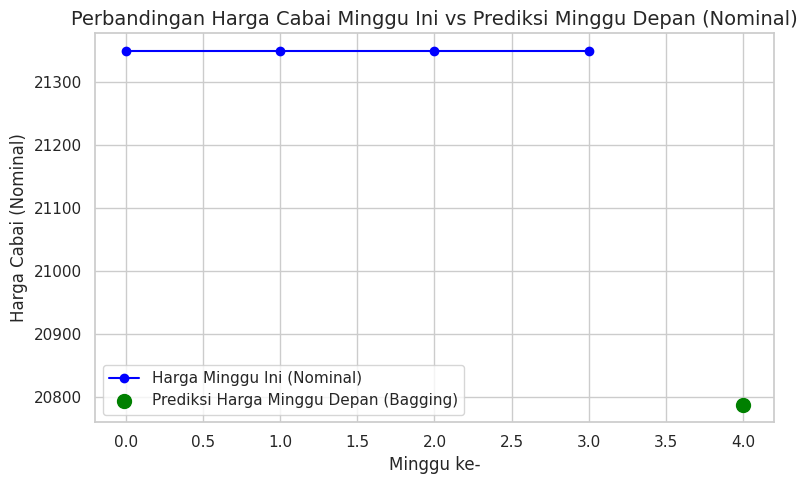

Harga cabai minggu ini (minggu terakhir, nominal): [21350. 21350. 21350. 21350.]
Prediksi harga cabai minggu depan (Bagging, nominal): 20788.166666666657


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error  # Import untuk MSE dan RMSE
import matplotlib.pyplot as plt

# Memuat data dari file CSV
file_path = 'Tabel Harga Berdasarkan Daerah(Mingguan).csv'
data = pd.read_csv(file_path)

# Memastikan kolom tanggal diubah menjadi tipe datetime
data['Tanggal'] = pd.to_datetime(data['Tanggal'], format='%d/%m/%Y', dayfirst=True)

# Normalisasi data
scaler = MinMaxScaler()
data_normalized = data.copy()
data_normalized[data_normalized.columns[1:]] = scaler.fit_transform(data_normalized[data_normalized.columns[1:]])

# Mengambil salah satu kolom harga untuk prediksi (misalnya kolom kedua, harga cabai)
df_slide = data_normalized[['Tanggal', data_normalized.columns[1]]].rename(columns={data_normalized.columns[1]: 'xt'})
df_slide.set_index('Tanggal', inplace=True)

# Membuat fungsi sliding window
def create_sliding_window(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)

# Membuat data sliding window (gunakan window size 4 minggu)
window_size = 4
X, y = create_sliding_window(df_slide['xt'].values, window_size)

# Membagi data menjadi training dan testing (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# === Model Bagging Regressor ===
base_estimator = DecisionTreeRegressor(random_state=42)
bagging_model = BaggingRegressor(estimator=base_estimator, n_estimators=100, random_state=42)
bagging_model.fit(X_train, y_train)

# === Prediksi harga di data uji ===
y_pred_bagging = bagging_model.predict(X_test)

# === Menghitung RMSE (tanpa denormalisasi, tetap di skala 0-1) ===
rmse_bagging_scaled = np.sqrt(mean_squared_error(y_test, y_pred_bagging))
print(f'RMSE Bagging Regressor : {rmse_bagging_scaled:.4f}')

# === Langkah 1: Ambil harga cabai minggu ini ===
# Harga cabai pada minggu terakhir data (harga aktual minggu ini)
current_week_prices = X_test[-1]  # Harga cabai minggu ini (window terakhir dalam data testing)

# === Langkah 2: Prediksi harga minggu depan menggunakan Bagging Regressor ===
predicted_price_next_week_bagging = bagging_model.predict([current_week_prices])[0]  # Prediksi harga minggu depan

# === Denormalisasi harga untuk menampilkan dalam nominal asli ===
# Denormalisasi harga cabai minggu ini
current_week_prices_nominal = scaler.inverse_transform([current_week_prices])[0]

# Denormalisasi harga prediksi minggu depan (Bagging Regressor)
predicted_price_next_week_nominal_bagging = scaler.inverse_transform([[predicted_price_next_week_bagging]])[0][0]

# === Visualisasi perbandingan dalam nominal ===
plt.figure(figsize=(8, 5))

# Plot harga minggu ini (nominal)
plt.plot(np.arange(window_size), current_week_prices_nominal, label='Harga Minggu Ini (Nominal)', color='blue', marker='o', linestyle='-')

# Plot prediksi harga minggu depan (nominal) - Bagging Regressor
plt.scatter(window_size, predicted_price_next_week_nominal_bagging, label='Prediksi Harga Minggu Depan (Bagging)', color='green', s=100)

# Menambahkan label dan judul
plt.title('Perbandingan Harga Cabai Minggu Ini vs Prediksi Minggu Depan (Nominal)', fontsize=14)
plt.xlabel('Minggu ke-', fontsize=12)
plt.ylabel('Harga Cabai (Nominal)', fontsize=12)
plt.grid(True)
plt.legend()

# Menampilkan grafik
plt.tight_layout()
plt.show()

# Output hasil nominal
print(f'Harga cabai minggu ini (minggu terakhir, nominal): {current_week_prices_nominal}')
print(f'Prediksi harga cabai minggu depan (Bagging, nominal): {predicted_price_next_week_nominal_bagging}')


MAPE (Bagging Regressor): 2.63%


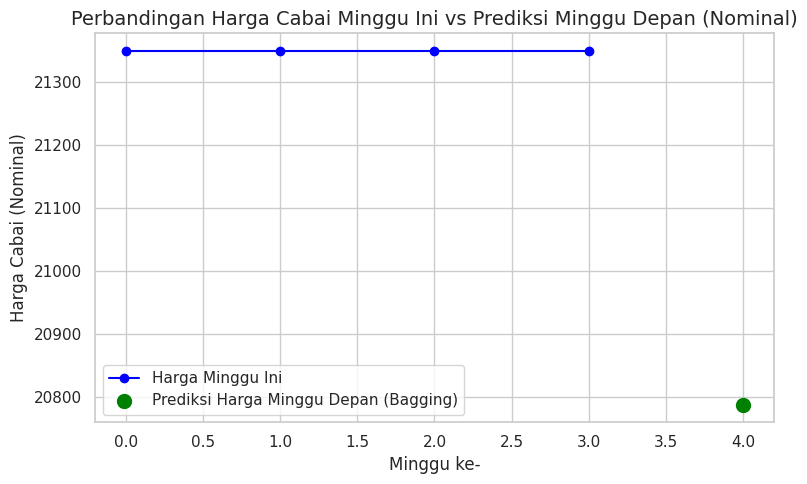

Harga cabai minggu ini (minggu terakhir, nominal): [21350. 21350. 21350. 21350.]
Prediksi harga cabai minggu depan (Bagging, nominal): 20788.166666666657


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_percentage_error

# Memuat data dari file CSV
file_path = 'Tabel Harga Berdasarkan Daerah(Mingguan).csv'
data = pd.read_csv(file_path)

# Memastikan kolom tanggal diubah menjadi tipe datetime
data['Tanggal'] = pd.to_datetime(data['Tanggal'], format='%d/%m/%Y', dayfirst=True)

# Normalisasi data
scaler = MinMaxScaler()
data_normalized = data.copy()
data_normalized[data_normalized.columns[1:]] = scaler.fit_transform(data_normalized[data_normalized.columns[1:]])

# Mengambil salah satu kolom harga untuk prediksi (misalnya kolom kedua, harga cabai)
df_slide = data_normalized[['Tanggal', data_normalized.columns[1]]].rename(columns={data_normalized.columns[1]: 'xt'})
df_slide.set_index('Tanggal', inplace=True)

# Membuat fungsi sliding window
def create_sliding_window(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)

# Membuat data sliding window (gunakan window size 4 minggu)
window_size = 4
X, y = create_sliding_window(df_slide['xt'].values, window_size)

# Membagi data menjadi training dan testing (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# === Model Bagging Regressor ===
base_estimator = DecisionTreeRegressor(random_state=42)
bagging_model = BaggingRegressor(estimator=base_estimator, n_estimators=100, random_state=42)  # Mengganti base_estimator dengan estimator
bagging_model.fit(X_train, y_train)

# === Langkah 1: Ambil harga cabai minggu ini ===
# Harga cabai pada minggu terakhir data (harga aktual minggu ini)
current_week_prices = X_test[-1]  # Harga cabai minggu ini (window terakhir dalam data testing)

# === Langkah 2: Prediksi harga minggu depan menggunakan Bagging Regressor ===
predicted_price_next_week_bagging = bagging_model.predict([current_week_prices])[0]  # Prediksi harga minggu depan

# === Denormalisasi harga untuk menampilkan dalam nominal asli ===
# Denormalisasi harga cabai minggu ini
current_week_prices_nominal = scaler.inverse_transform([current_week_prices])[0]

# Denormalisasi harga prediksi minggu depan (Bagging Regressor)
predicted_price_next_week_nominal_bagging = scaler.inverse_transform([[predicted_price_next_week_bagging]])[0][0]

# === Menghitung MAPE (Mean Absolute Percentage Error) ===
# Menggunakan harga minggu ini sebagai perbandingan dengan prediksi minggu depan
mape_bagging = mean_absolute_percentage_error([current_week_prices_nominal[-1]], [predicted_price_next_week_nominal_bagging])

print(f'MAPE (Bagging Regressor): {mape_bagging * 100:.2f}%')

# === Visualisasi perbandingan ===
plt.figure(figsize=(8, 5))

# Plot harga minggu ini (nominal)
plt.plot(np.arange(window_size), current_week_prices_nominal, label='Harga Minggu Ini', color='blue', marker='o', linestyle='-')

# Plot prediksi harga minggu depan (nominal) - Bagging Regressor
plt.scatter(window_size, predicted_price_next_week_nominal_bagging, label='Prediksi Harga Minggu Depan (Bagging)', color='green', s=100)

# Menambahkan label dan judul
plt.title('Perbandingan Harga Cabai Minggu Ini vs Prediksi Minggu Depan (Nominal)', fontsize=14)
plt.xlabel('Minggu ke-', fontsize=12)
plt.ylabel('Harga Cabai (Nominal)', fontsize=12)
plt.grid(True)
plt.legend()

# Menampilkan grafik
plt.tight_layout()
plt.show()

# Output hasil nominal
print(f'Harga cabai minggu ini (minggu terakhir, nominal): {current_week_prices_nominal}')
print(f'Prediksi harga cabai minggu depan (Bagging, nominal): {predicted_price_next_week_nominal_bagging}')


**parameter terbaik**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# Memuat data dari file CSV
file_path = 'Tabel Harga Berdasarkan Daerah(Mingguan).csv'
data = pd.read_csv(file_path)

# Memastikan kolom tanggal diubah menjadi tipe datetime
data['Tanggal'] = pd.to_datetime(data['Tanggal'], format='%d/%m/%Y', dayfirst=True)

# Normalisasi data
scaler = MinMaxScaler()
data_normalized = data.copy()
data_normalized[data_normalized.columns[1:]] = scaler.fit_transform(data_normalized[data_normalized.columns[1:]])

# Mengambil salah satu kolom harga untuk prediksi (misalnya kolom kedua, harga cabai)
df_slide = data_normalized[['Tanggal', data_normalized.columns[1]]].rename(columns={data_normalized.columns[1]: 'xt'})
df_slide.set_index('Tanggal', inplace=True)

# Membuat fungsi sliding window
def create_sliding_window(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)

# Membuat data sliding window (gunakan window size 4 minggu)
window_size = 4
X, y = create_sliding_window(df_slide['xt'].values, window_size)

# Membagi data menjadi training dan testing (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# === Parameter Grid untuk Model ===
# 1. Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
}

# 2. Gradient Boosting
gb_param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 7],
}

# 3. Bagging Regressor
bagging_param_grid = {
    'n_estimators': [50, 100],
    'estimator': [DecisionTreeRegressor(), RandomForestRegressor(n_estimators=50)],  # Mengganti base_estimator dengan estimator
}

# === Mencari Parameter Terbaik dengan GridSearchCV ===
# 1. Random Forest
rf_grid_search = GridSearchCV(RandomForestRegressor(random_state=42), rf_param_grid, scoring='neg_root_mean_squared_error', cv=5)
rf_grid_search.fit(X_train, y_train)
rf_best_params = rf_grid_search.best_params_

# 2. Gradient Boosting
gb_grid_search = GridSearchCV(GradientBoostingRegressor(random_state=42), gb_param_grid, scoring='neg_root_mean_squared_error', cv=5)
gb_grid_search.fit(X_train, y_train)
gb_best_params = gb_grid_search.best_params_

# 3. Bagging Regressor
bagging_grid_search = GridSearchCV(BaggingRegressor(random_state=42), bagging_param_grid, scoring='neg_root_mean_squared_error', cv=5)
bagging_grid_search.fit(X_train, y_train)
bagging_best_params = bagging_grid_search.best_params_

# === Tampilkan Hasil ===
print("Best Parameters for Random Forest:", rf_best_params)
print("Best Parameters for Gradient Boosting:", gb_best_params)
print("Best Parameters for Bagging Regressor:", bagging_best_params)

# Menghitung dan mencetak RMSE untuk masing-masing model dengan parameter terbaik
rf_best_model = RandomForestRegressor(**rf_best_params, random_state=42)
rf_best_model.fit(X_train, y_train)
rf_predictions = rf_best_model.predict(X_test)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))

gb_best_model = GradientBoostingRegressor(**gb_best_params, random_state=42)
gb_best_model.fit(X_train, y_train)
gb_predictions = gb_best_model.predict(X_test)
gb_rmse = np.sqrt(mean_squared_error(y_test, gb_predictions))

bagging_best_model = BaggingRegressor(**bagging_best_params, random_state=42)
bagging_best_model.fit(X_train, y_train)
bagging_predictions = bagging_best_model.predict(X_test)
bagging_rmse = np.sqrt(mean_squared_error(y_test, bagging_predictions))

print(f'Random Forest RMSE: {rf_rmse:.2f}')
print(f'Gradient Boosting RMSE: {gb_rmse:.2f}')
print(f'Bagging Regressor RMSE: {bagging_rmse:.2f}')


Best Parameters for Random Forest: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 50}
Best Parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
Best Parameters for Bagging Regressor: {'estimator': RandomForestRegressor(n_estimators=50), 'n_estimators': 50}
Random Forest RMSE: 0.08
Gradient Boosting RMSE: 0.09
Bagging Regressor RMSE: 0.08


**prediksi harga terbaik**

In [ ]:
# Melakukan prediksi untuk minggu depan dengan model terbaik
# Ambil data terakhir dari set pelatihan dan buat sliding window untuk prediksi
last_data = df_slide['xt'].values[-window_size:]  # Ambil data terakhir sesuai dengan window size
X_next_week = last_data.reshape(1, -1)  # Ubah bentuk menjadi 2D untuk model prediksi

# Menggunakan model terbaik untuk memprediksi harga minggu depan
rf_next_week_prediction = rf_best_model.predict(X_next_week)
gb_next_week_prediction = gb_best_model.predict(X_next_week)
bagging_next_week_prediction = bagging_best_model.predict(X_next_week)

# Menampilkan hasil prediksi
print(f"Prediksi Harga Cabai Minggu Depan:")
print(f"Random Forest Prediction: {scaler.inverse_transform([[rf_next_week_prediction[0]]])[0][0]:.2f}")
print(f"Gradient Boosting Prediction: {scaler.inverse_transform([[gb_next_week_prediction[0]]])[0][0]:.2f}")
print(f"Bagging Regressor Prediction: {scaler.inverse_transform([[bagging_next_week_prediction[0]]])[0][0]:.2f}")


Prediksi Harga Cabai Minggu Depan:
Random Forest Prediction: 11964.14
Gradient Boosting Prediction: 11977.92
Bagging Regressor Prediction: 13500.02
